## Anscombe Dataset. A research.

### Francis John Anscombe

Francis John Anscombe (13 May 1918 – 17 October 2001) was an English statistician renowned for his works on randomisation, analysis of variance (Anscombre transform, used to stabilise Standard Deviation in Poisson distributions is named after him) and computer statistics.

He published an article in 1973, titled __Graphs in Statistical Analysis__ in which he focused on the importance of having graphical representation of the variables to be analysed. He illustrated this point by presenting a data-set with particular characteristics. The article, published in The American Statistician, Vol. 27, No. 1. (Feb., 1973), pp. 17-21., can be visited following [this link](http://www.sjsu.edu/faculty/gerstman/StatPrimer/anscombe1973.pdf).

We have to think that in 1973 the possibility of plotting data-sets was quite tedious and, due to the stage in the availability an development of computer science, quite unaffordable. However, he insisted in the importance of developing graphical analysis systems to avoid misinterpretation of data and constructing weak analysis.

### Anscombe dataset

This is a well-known data set, consisting in 4 different sets of (x,y) values.Each data-set has a series of x values and dependent y values. 

Interestingly, these four different data sets have essentially the same values for:

- mean of x
- variance of x
- mean of y
- variance of y
- correlation between x and y

As a first aproach, the data-set is displayed using DataFrames from pandas package.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Importing dataset from csv file using pandas
data = pd.read_csv("anscombe.csv")
print (data)


    x1  x2  x3  x4     y1    y2     y3     y4
0   10  10  10   8   8.04  9.14   7.46   6.58
1    8   8   8   8   6.95  8.14   6.77   5.76
2   13  13  13   8   7.58  8.74  12.74   7.71
3    9   9   9   8   8.81  8.77   7.11   8.84
4   11  11  11   8   8.33  9.26   7.81   8.47
5   14  14  14   8   9.96  8.10   8.84   7.04
6    6   6   6   8   7.24  6.13   6.08   5.25
7    4   4   4  19   4.26  3.10   5.39  12.50
8   12  12  12   8  10.84  9.13   8.15   5.56
9    7   7   7   8   4.82  7.26   6.42   7.91
10   5   5   5   8   5.68  4.74   5.73   6.89


### Obtaining summary statistics of the data set

Summary statistics show, matchong with the description, almost the same values for means and standard deviations in both x and y sets.

According to this information, we might be inclined to state that x and y distributions are both alike.


In [3]:
# Transforming dataset into DataFrame and describing its components
df = pd.DataFrame(data)
print (df.describe())

              x1         x2         x3         x4         y1         y2  \
count  11.000000  11.000000  11.000000  11.000000  11.000000  11.000000   
mean    9.000000   9.000000   9.000000   9.000000   7.500909   7.500909   
std     3.316625   3.316625   3.316625   3.316625   2.031568   2.031657   
min     4.000000   4.000000   4.000000   8.000000   4.260000   3.100000   
25%     6.500000   6.500000   6.500000   8.000000   6.315000   6.695000   
50%     9.000000   9.000000   9.000000   8.000000   7.580000   8.140000   
75%    11.500000  11.500000  11.500000   8.000000   8.570000   8.950000   
max    14.000000  14.000000  14.000000  19.000000  10.840000   9.260000   

              y3         y4  
count  11.000000  11.000000  
mean    7.500000   7.500909  
std     2.030424   2.030579  
min     5.390000   5.250000  
25%     6.250000   6.170000  
50%     7.110000   7.040000  
75%     7.980000   8.190000  
max    12.740000  12.500000  


The definition also specified that correlation between every (x,y) set is almost the same. Pearson correlation coeficients are calculated for every pair.

The result is, indeed, roughly the same for every pair. 

In [4]:
# df.corr(['x1'],['y1'])
corr1 = df.corr()['x1']['y1']
corr2 = df.corr()['x2']['y2']
corr3 = df.corr()['x3']['y3']
corr4 = df.corr()['x4']['y4']

sets=("(x1, y1)", "(x2, y2)", "(x3, y3)", "(x4, y4)")
corrs=(corr1, corr2, corr3, corr4)
corrsets={
    "(x1, y1)":(corr1), "(x2, y2)":(corr2), "(x3, y3)":(corr3), "(x4, y4)":(corr4)
}

for sets, corrs in corrsets.items():
    print ("Set",(sets), "\nLinear correlation coeficient: ",(corrs),"\n")

Set (x1, y1) 
Linear correlation coeficient:  0.81642051634484 

Set (x2, y2) 
Linear correlation coeficient:  0.8162365060002428 

Set (x3, y3) 
Linear correlation coeficient:  0.8162867394895981 

Set (x4, y4) 
Linear correlation coeficient:  0.8165214368885028 



### Graphical Representation



Once established that this data-set complies with the definition and includes all its specific characteristics (equal, or very similar, means of x, means of y, variance of x, variance of y and linear correlatrion coeficients for every x-y set), we could conclude that these four sets are quite similar.

And as such, we could think that there is no need for further investigation, provided that the summary statistics have alredy proven that these four sets behave in an almost identical way.

However, we can still use graphical representation, although we could expect little information beyond what has been already gathered.

For binomial sets as these, the most appropiate way of representation are disperssion plots (or scatter plots):

'\nAlternative code, but still struggling with labels\nfig, axes = plt.subplots(2, 2)\naxes[0, 0].scatter(df[\'x1\'],df[\'y1\'])\nax.set_title("Title for first plot")\naxes[0, 1].scatter(df[\'x2\'],df[\'y2\'])\naxes[1, 0].scatter(df[\'x3\'],df[\'y3\'])\naxes[1, 1].scatter(df[\'x4\'],df[\'y4\'])\n'

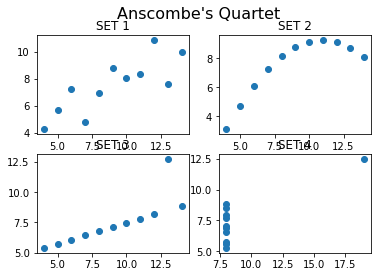

In [59]:
fig = plt.figure()
fig.suptitle("Anscombe's Quartet", fontsize=16)
ax = plt.subplot("221")
ax.set_title("SET 1")
ax.scatter(df['x1'],df['y1'])

ax = plt.subplot("222")
ax.set_title("SET 2")
ax.scatter(df['x2'],df['y2'])

ax = plt.subplot("223")
ax.set_title("SET 3")
ax.scatter(df['x3'],df['y3'])

ax = plt.subplot("224")
ax.set_title("SET 4")
ax.scatter(df['x4'],df['y4'])

'''
Alternative code, but still struggling with labels
fig, axes = plt.subplots(2, 2)
axes[0, 0].scatter(df['x1'],df['y1'])
ax.set_title("Title for first plot")
axes[0, 1].scatter(df['x2'],df['y2'])
axes[1, 0].scatter(df['x3'],df['y3'])
axes[1, 1].scatter(df['x4'],df['y4'])
'''

Surprisingly, all four sets have a completely different representation, although they still are sharing mean, variance (and thus, standard deviation) and correlation coeficients.

Let's have a closer look to these four sets:

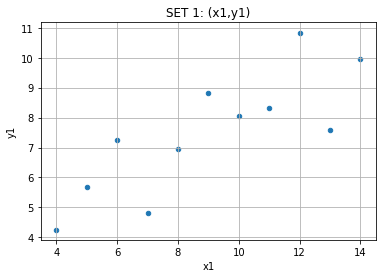

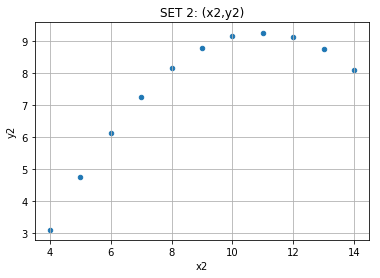

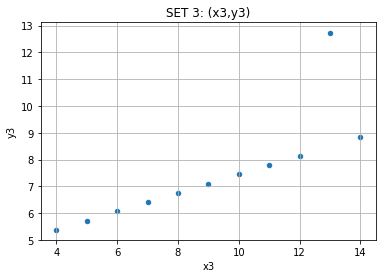

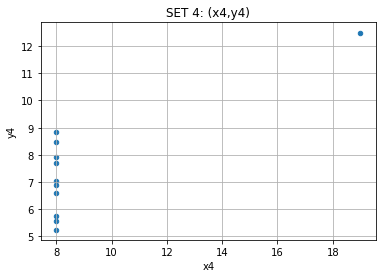

In [60]:

df.plot.scatter('x1','y1',grid=True, title='SET 1: (x1,y1)')
df.plot.scatter('x2','y2',grid=True, title='SET 2: (x2,y2)')
df.plot.scatter('x3','y3',grid=True, title='SET 3: (x3,y3)')
df.plot.scatter('x4','y4',grid=True, title='SET 4: (x4,y4)')

Further from the initil surprise, we can see some differences between these four plots.

Plot 1 is what we are used to see and what we are used to see when plotting a 2-d set. Different markers distributed irregularly but also creating an imaginary striaght line that could roughly fit this distribution.
Plot 2, on the other hand, represents a clear pattern at first sight, and we can imagine where the perception error is. We were so focused on the linear regression coefficient that we didn't stop to analyse if that was the best fit for a regression model. It seems cler that regression model for set number 2 could be better fit in a curve than in a straight line.
And plots 3 and 4 both, even with a completely different distribution, fall under the same problem: outliers.

It is a well-known problem for scientifists that the presence of extreme cases in an otherwise constant distribution will create interferences in the general model. In fact, a quite common work-around consists in identifying outliers and excluding them from the general model.

## Conclusions

Anscombe presented his famous Quartet in a paper titled _Graphs in Statistical Analysis_ in 1973. By the time, graphical representation technologies were in a very early stage. Computer science was still a discipline in development, with expensive and scarce computers available for the common researcher or student. Furhermore, their computational capabilities were light-yers away from those in ournowadays personal computers or cell phones. Anscombe, as an expert in scientific anlysis, states in this article 
>>_"A computer should make both calculations and graphs. Both sorts of output should be studied; each will contribute to understanding."

The second thought, related to the need of developing tools for analysis, is rooted in the statistical science applied to analytical tasks. Anscombe proves the importance of combining calculations, but also of testing graphical distribution, since both can help the researcher to understand the reality.

## Anscombe's Quartet Legacy. The Datasaurius Dozen

45 years after Ascombe's article was published, it still echoes and is shown as a brilliant piece of scientific literature, clearly exposing the main thesis and proving them by means of a surprising, but scientifically accurate exposition.

During the research period to ellaborate this project, I have come accross a very interesting article in which authors want to pay tribute to Anscombe, creating a new set of 12 surprising data-sets. I do recommend a visit to this article, which can be found [through this link](https://www.autodeskresearch.com/publications/samestats).
